Multiple Linear Regression

In [26]:
import numpy as numpy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [27]:
data=pd.read_csv("Data\startup.csv")

In [28]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [29]:
states=pd.get_dummies(data["State"],drop_first=True)

In [30]:
data=pd.concat([data,states],axis=1)

In [31]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [32]:
data.columns=["Spend","admin","Mar Spend","State","Profit","State1","State2"]

In [33]:
data.head()

,Spend,admin,Mar Spend,State,Profit,State1,State2
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


Splitting data into x and y

In [34]:
X=data.drop(columns=["Profit","State"])

In [35]:
X.head()

,Spend,admin,Mar Spend,State1,State2
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [36]:
y=data["Profit"]

In [37]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [39]:
LR=LinearRegression()
LR.fit(X_train,y_train)
pred=LR.predict(X_test)

In [41]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)

In [42]:
print(score)

0.9438509847891488


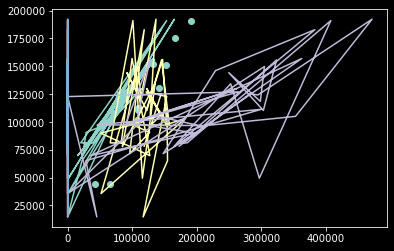